In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pywt import wavedec
from scipy.signal import find_peaks
from scipy.stats import median_absolute_deviation
from sklearn.linear_model import lars_path

from Scripts.debiasing import debiasing_int, debiasing
from Scripts.fista_update import fista_update as fista
from Scripts.hrf_matrix import HRFMatrix
from Scripts.temporal_ta import filter_boundary as ta_filter
from Scripts.total_activation import total_activation as ta
from Scripts.total_activation import hrf_filters
from Scripts.simulate import fMRIsim
from Scripts.stability_selection import stability_selection

In [2]:
seed = 50
import matplotlib.pylab as pylab
fontsize = 35
plt.rcParams.update({'font.size': fontsize})
params = {'legend.fontsize': fontsize,
         'axes.labelsize': fontsize,
         'axes.titlesize': fontsize,
         'xtick.labelsize': fontsize,
         'ytick.labelsize': fontsize}
pylab.rcParams.update(params)

In [3]:
nscans = 260

#################################
##### TR = 0.5s
#################################

params = {'tr': 0.5, 'cost_save': True, 'te': [0]} # This is for TA (to follow MATLAB code structure)
# Generate design matrix (shifted HRFs) for PFM with the spike model
hrf_matrix_05 = HRFMatrix(TR=params['tr'], TE=params['te'], nscans=nscans, r2only=True, has_integrator=False, is_afni=True, lop_hrf='SPMG1')
hrf_matrix_05.generate_hrf()
hrf_SPMG1_05 = hrf_matrix_05.X_hrf_norm

# Generate hrf filter for TA with spike model
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

test_data_05 = np.zeros(nscans)
test_data_05[int(0/params['tr'])] = 1

bold_pfm_05 = np.dot(hrf_SPMG1_05, test_data_05)
bold_ta_05 = np.real(ta_filter(n, d, test_data_05.T, 'normal', nscans))

time_05 = np.linspace(0, nscans*0.5, nscans)
time_idx_05 = np.where(time_05 >= 24)[0][0]

#################################
##### TR = 1s
#################################

params = {'tr': 1, 'cost_save': True, 'te': [0]} # This is for TA (to follow MATLAB code structure)
# Generate design matrix (shifted HRFs) for PFM with the spike model
hrf_matrix_1 = HRFMatrix(TR=params['tr'], TE=params['te'], nscans=nscans, r2only=True, has_integrator=False, is_afni=True, lop_hrf='SPMG1')
hrf_matrix_1.generate_hrf()
hrf_SPMG1_1 = hrf_matrix_1.X_hrf_norm

# Generate hrf filter for TA with spike model
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

test_data_1 = np.zeros(nscans)
test_data_1[int(0/params['tr'])] = 1

bold_pfm_1 = np.dot(hrf_SPMG1_1, test_data_1)
bold_ta_1 = np.real(ta_filter(n, d, test_data_1.T, 'normal', nscans))

time_1 = np.linspace(0, nscans*1, nscans)
time_idx_1 = np.where(time_1 >= 24)[0][0]

#################################
##### TR = 2s
#################################

# Generate design matrix (shifted HRFs) for PFM with the spike model
hrf_matrix_2 = HRFMatrix(TR=2, TE=params['te'], nscans=nscans, r2only=True, has_integrator=False, is_afni=True, lop_hrf='SPMG1')
hrf_matrix_2.generate_hrf()
hrf_SPMG1_2 = hrf_matrix_2.X_hrf_norm

# Generate hrf filter for TA with spike model
params = {'tr': 2, 'cost_save': True, 'te': [0]} # This is for TA (to follow MATLAB code structure)
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

test_data_2 = np.zeros(nscans)
test_data_2[int(0/params['tr'])] = 1

bold_pfm_2 = np.dot(hrf_SPMG1_2, test_data_2)
bold_ta_2 = np.real(ta_filter(n, d, test_data_2.T, 'normal', nscans))

time_2 = np.linspace(0, nscans*2, nscans)
time_idx_2 = np.where(time_2 >= 25)[0][0]


Duration of HRF was not sufficient for specified model. Doubling duration and computing again.
Duration of HRF was not sufficient for specified model. Doubling duration and computing again.


/Users/enekourunuela/pfm_vs_ta/code/Scripts/total_activation.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fil[i + 1] = (-1) ** (i + 1) * np.sum(np.exp(np.sum(combs_result, axis=1)))


Duration of HRF was not sufficient for specified model. Doubling duration and computing again.


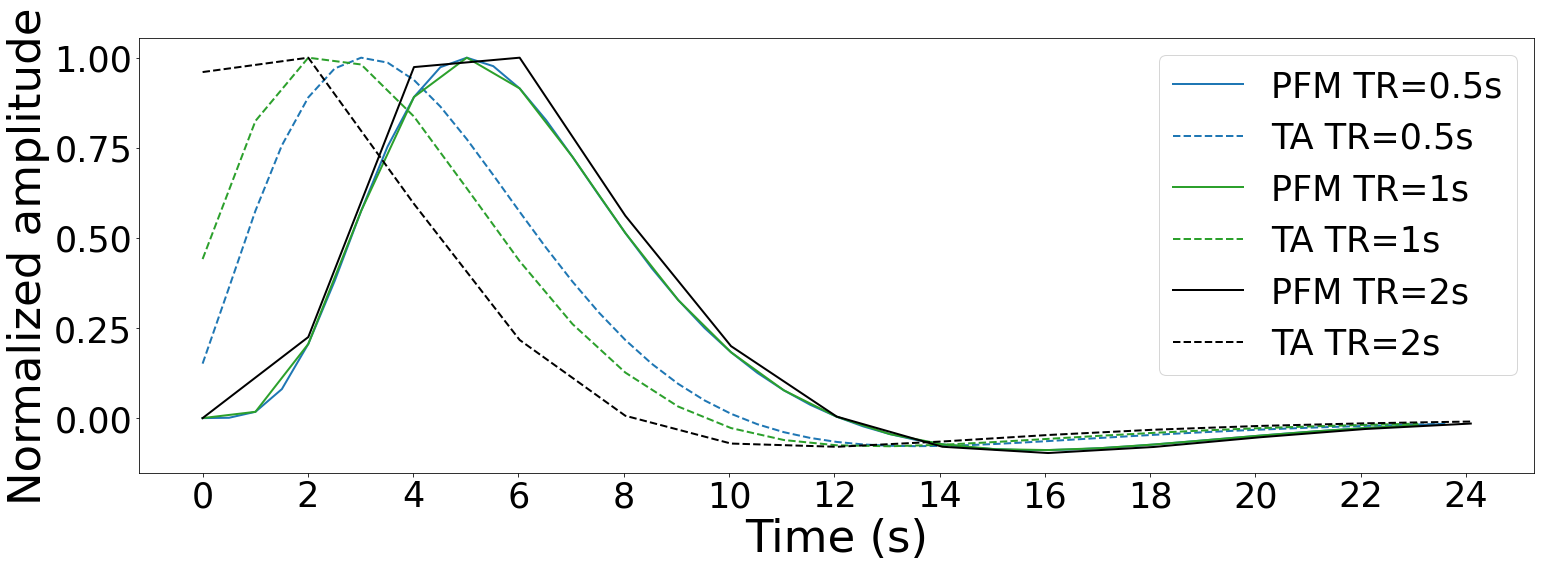

In [15]:
plt.figure(figsize=(25,8))

plt.plot(time_05[:time_idx_05], bold_pfm_05[:time_idx_05]/np.max(bold_pfm_05[:time_idx_05]), label='PFM TR=0.5s', color='tab:blue', linewidth=2)
plt.plot(time_05[:time_idx_05], bold_ta_05[:time_idx_05]/np.max(bold_ta_05[:time_idx_05]), label='TA TR=0.5s', color='tab:blue', linestyle="--", linewidth=2)

plt.plot(time_1[:time_idx_1], bold_pfm_1[:time_idx_1]/np.max(bold_pfm_1[:time_idx_1]), label='PFM TR=1s', color='tab:green', linewidth=2)
plt.plot(time_1[:time_idx_1], bold_ta_1[:time_idx_1]/np.max(bold_ta_1[:time_idx_1]), label='TA TR=1s', color='tab:green', linestyle="--", linewidth=2)

plt.plot(time_2[:time_idx_2], bold_pfm_2[:time_idx_2]/np.max(bold_pfm_2[:time_idx_2]), label='PFM TR=2s', color='black', linewidth=2)
plt.plot(time_2[:time_idx_2], bold_ta_2[:time_idx_2]/np.max(bold_ta_2[:time_idx_2]), label='TA TR=2s', color='black', linestyle="--", linewidth=2)

plt.xticks(np.arange(0, 25, step=2), fontsize=fontsize) 
plt.yticks(fontsize=fontsize)
ax = plt.gca()
ax.set_xlabel('Time (s)', fontsize=fontsize+10)
ax.set_ylabel('Normalized amplitude', fontsize=fontsize+10)
plt.legend(fontsize=fontsize)

In [5]:
params = {'tr': 1, 'cost_save': True, 'te': [0]} # This is for TA (to follow MATLAB code structure)
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

test_data = np.zeros(nscans)
test_data[int(0/params['tr'])] = 1

# Generate design matrix (shifted HRFs) for PFM with the spike model
hrf_matrix = HRFMatrix(TR=params['tr'], TE=params['te'], nscans=nscans, r2only=True, has_integrator=False, is_afni=True, lop_hrf='SPMG1')
hrf_matrix.generate_hrf()
hrf = hrf_matrix.X_hrf_norm

# Generate hrf filter for TA with spike model
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

bold_pfm = np.dot(hrf, test_data)
bold_ta = np.real(ta_filter(n, d, test_data.T, 'normal', nscans))

append_2 = 2*nscans - len(bold_ta)
temp = np.append(bold_ta, np.zeros(append_2))
for i in range(nscans-1):
    foo = np.append(np.zeros(i+1), bold_ta)
    append_2 = 2*nscans - len(foo)
    foo = np.append(foo, np.zeros(append_2))
    temp = np.column_stack((temp, foo))

hrf = temp[:nscans, :nscans]

/Users/enekourunuela/pfm_vs_ta/code/Scripts/total_activation.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fil[i + 1] = (-1) ** (i + 1) * np.sum(np.exp(np.sum(combs_result, axis=1)))


Duration of HRF was not sufficient for specified model. Doubling duration and computing again.


Text(0, 0.5, 'Normalized amplitude')

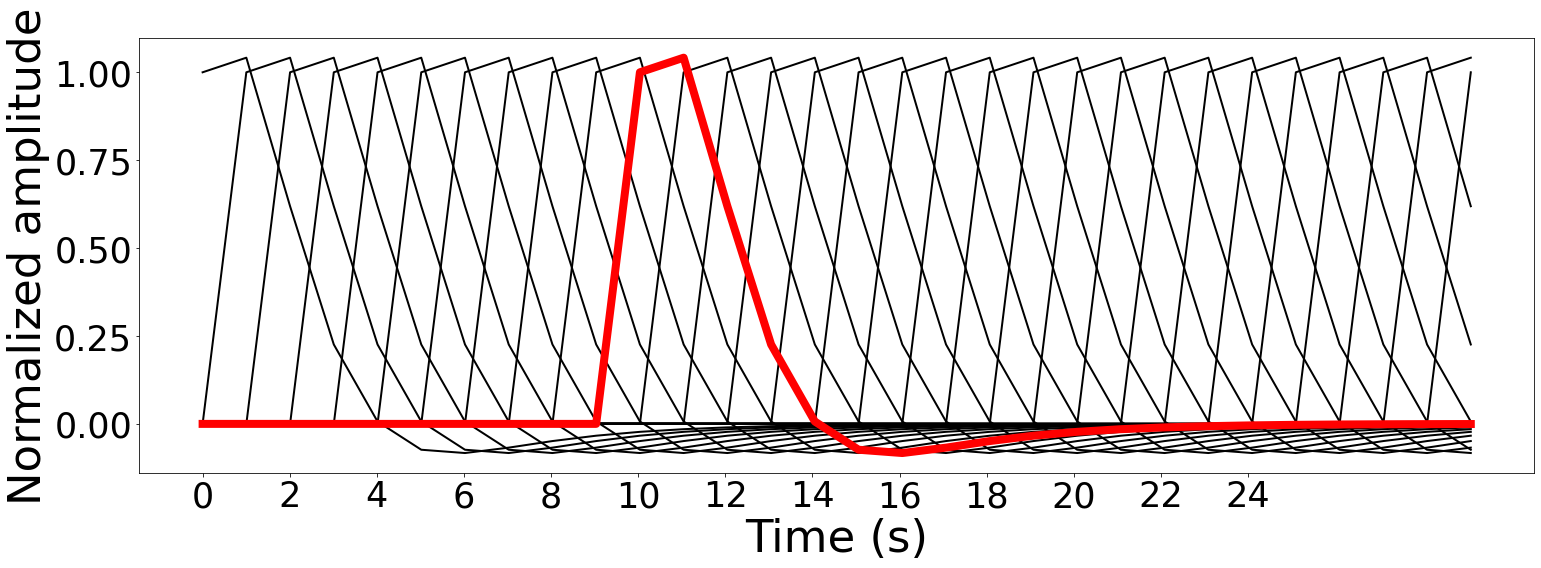

In [17]:
plt.figure(figsize=(25,8))

leng = 30
for i in range(leng):
    plt.plot(time_1[:leng], hrf[:leng,i], color='black', linewidth=2)

    
plt.plot(time_1[:leng], hrf[:leng, 10], color='red', linewidth=8)

plt.xticks(np.arange(0, 25, step=2), fontsize=fontsize) 
plt.yticks(fontsize=fontsize)
ax = plt.gca()
ax.set_xlabel('Time (s)', fontsize=fontsize+10)
ax.set_ylabel('Normalized amplitude', fontsize=fontsize+10)

In [7]:
# Initialize class
sim = fMRIsim()

# Set parameters
sim.nvoxels = 1
sim.te = [35] # Must be a list
sim.db = 3 # SNR
sim.tr = 2
sim.duration = 400

sim.r2[28:34,:] = 1
sim.r2[50:51,:] = 1
sim.r2[80:81,:] = 1
sim.r2[130:134,:] = 1
sim.r2[138:140,:] = 1

# Simulate timeseries
np.random.seed(seed)
sim.simulate()

# Load data
data = sim.simulation
ground_truth_bold = sim.bold
ground_truth_beta = sim.r2
ground_truth_inno = sim.innovation
nscans = data.shape[0]
nvoxels = data.shape[1]
print(f'Data has {nscans} scans and {nvoxels} voxels')

Saving simulated data...
Data has 200 scans and 1 voxels


In [8]:
params = {'tr': 2, 'cost_save': True, 'te': [0]} # This is for TA (to follow MATLAB code structure)
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

test_data = np.zeros(nscans)
test_data[int(0/params['tr'])] = 1

# Generate design matrix (shifted HRFs) for PFM with the spike model
hrf_matrix = HRFMatrix(TR=params['tr'], TE=params['te'], nscans=nscans, r2only=True, has_integrator=False, is_afni=True, lop_hrf='SPMG1')
hrf_matrix.generate_hrf()
hrf = hrf_matrix.X_hrf_norm

# Generate hrf filter for TA with spike model
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'], condition2='spmhrf')
n = params['f_recons']['den'][0]
d = [np.array(params['f_recons']['num']), 1]

bold_pfm = np.dot(hrf, test_data)
bold_ta = np.real(ta_filter(n, d, test_data.T, 'normal', nscans))

append_2 = 2*nscans - len(bold_ta)
temp = np.append(bold_ta, np.zeros(append_2))
for i in range(nscans-1):
    foo = np.append(np.zeros(i+1), bold_ta)
    append_2 = 2*nscans - len(foo)
    foo = np.append(foo, np.zeros(append_2))
    temp = np.column_stack((temp, foo))

hrf = temp[:nscans, :nscans]

/Users/enekourunuela/pfm_vs_ta/code/Scripts/total_activation.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  fil[i + 1] = (-1) ** (i + 1) * np.sum(np.exp(np.sum(combs_result, axis=1)))


In [9]:
# Generate hrf filter for TA with spike model
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'])
n = params['f_analyze']['num']
d = params['f_analyze']['den']

# Define the number of lambdas in LARS (relative the length of time series), i.e. no need to compute solutions close to OLS
nlambdas = int(nscans)
min_coeff_amplitude = 1e-3

for vox_idx in range(1): #range(nvoxels):
    print(f'Running LARS for PFM on voxel {vox_idx + 1} of {nvoxels}...')
    
    y = data[:, vox_idx]
    y = y[:, np.newaxis]
    
    pfm_max_lambda = np.max(np.dot(hrf.T, y))
    print(f'PFM max lambda: {pfm_max_lambda}')
    # LARS path
    lambdas_pfm_spike, _, pfm_spike_coef_path = lars_path(hrf, np.squeeze(y), method = 'lasso', Gram = np.dot(hrf.T, hrf),
                                                          Xy = np.dot(hrf.T, np.squeeze(y)), max_iter = nlambdas-1, eps=1e-9)
    
    # Multiply lambdas by nscans due to LARS implementation in scikit learn 
    lambdas_pfm_spike *= nscans
    pfm_spike_coef_path[abs(pfm_spike_coef_path) < min_coeff_amplitude] = 0
    
    # Compute residuals for model selection criteria (BIC and AIC)
    L2res_pfm_spike = np.sum((np.repeat(y, nlambdas, axis=-1) - np.dot(hrf, pfm_spike_coef_path))**2, axis=0)
    # BIC regularization curve
    bic_pfm_spike = nscans*np.log(L2res_pfm_spike) + np.log(nscans)*np.count_nonzero(pfm_spike_coef_path, axis=0)
    # AIC regularization curve
    aic_pfm_spike = nscans*np.log(L2res_pfm_spike) + 2*np.count_nonzero(pfm_spike_coef_path, axis=0)
    
    # Compute TA for the same regularization path (i.e. same lambdas)
    print(f'Calculating regularization path for TA on voxel {vox_idx + 1} of {nvoxels}...')
    #ta_max_lambda = np.max(ta_filter(n, d, y, 'transpose', nscans))
    ta_max_lambda = abs(np.max(y)/np.min(ta_filter(n, d, y, 'transpose', nscans))*params['maxeig'])
    print(f'TA max lambda: {ta_max_lambda}')
    #lambdas_ta_spike = np.geomspace(ta_max_lambda, 0.1*ta_max_lambda, nlambdas)
    lambdas_ta_spike = lambdas_pfm_spike.copy()
    ta_spike_coef_path = np.zeros(pfm_spike_coef_path.shape) # Shape: nscans x nlambdas
    for lambda_idx in range(nlambdas):
        ta_coefs, _ = ta(y, params, lambd=lambdas_ta_spike[lambda_idx])
        ta_spike_coef_path[:, lambda_idx] = np.squeeze(ta_coefs)
        
    ta_spike_coef_path[abs(ta_spike_coef_path) < min_coeff_amplitude] = 0
    
    # Compute residuals for model selection criteria (BIC and AIC)
    L2res_ta = np.sum((np.repeat(y, nlambdas, axis=-1) - np.dot(hrf, ta_spike_coef_path))**2, axis=0)
    bic_ta_spike = nscans*np.log(L2res_ta) + np.log(nscans)*np.count_nonzero(ta_spike_coef_path, axis=0)
    aic_ta_spike = nscans*np.log(L2res_ta) + 2*np.count_nonzero(ta_spike_coef_path, axis=0)
    
    print(f'Regularization path of voxel {vox_idx + 1} calculated')

# Find the optimal lambdas for each method (PFM, TA) and each selection criteria (BIC, AIC)    
bic_pfm_spike_idx = np.argmin(bic_pfm_spike)
aic_pfm_spike_idx = np.argmin(aic_pfm_spike)
bic_ta_spike_idx = np.argmin(bic_ta_spike)
aic_ta_spike_idx = np.argmin(aic_ta_spike)

Running LARS for PFM on voxel 1 of 1...
PFM max lambda: 0.12287692674867307
Calculating regularization path for TA on voxel 1 of 1...
TA max lambda: 12.353497856529126
Regularization path of voxel 1 calculated


In [10]:
params['model'] = 'spike'
params['f_analyze'], params['f_recons'], params['maxeig'] = hrf_filters(params['tr'], condition=params['model'])
n = params['f_analyze']['num']
d = params['f_analyze']['den']
params['NitTemp'] = 200

_, cD1 = wavedec(y, 'db3', level=1, axis=0)
noise_estimate = np.median(abs(cD1 - np.median(cD1))) / 0.8095

ta_coefs, ta_lambdas = ta(y, params, update_lambda=True, lambd=noise_estimate)

mad_lambda = ta_lambdas[-1]
mad_lambda_idx = np.where(lambdas_pfm_spike <= mad_lambda)[0][0]

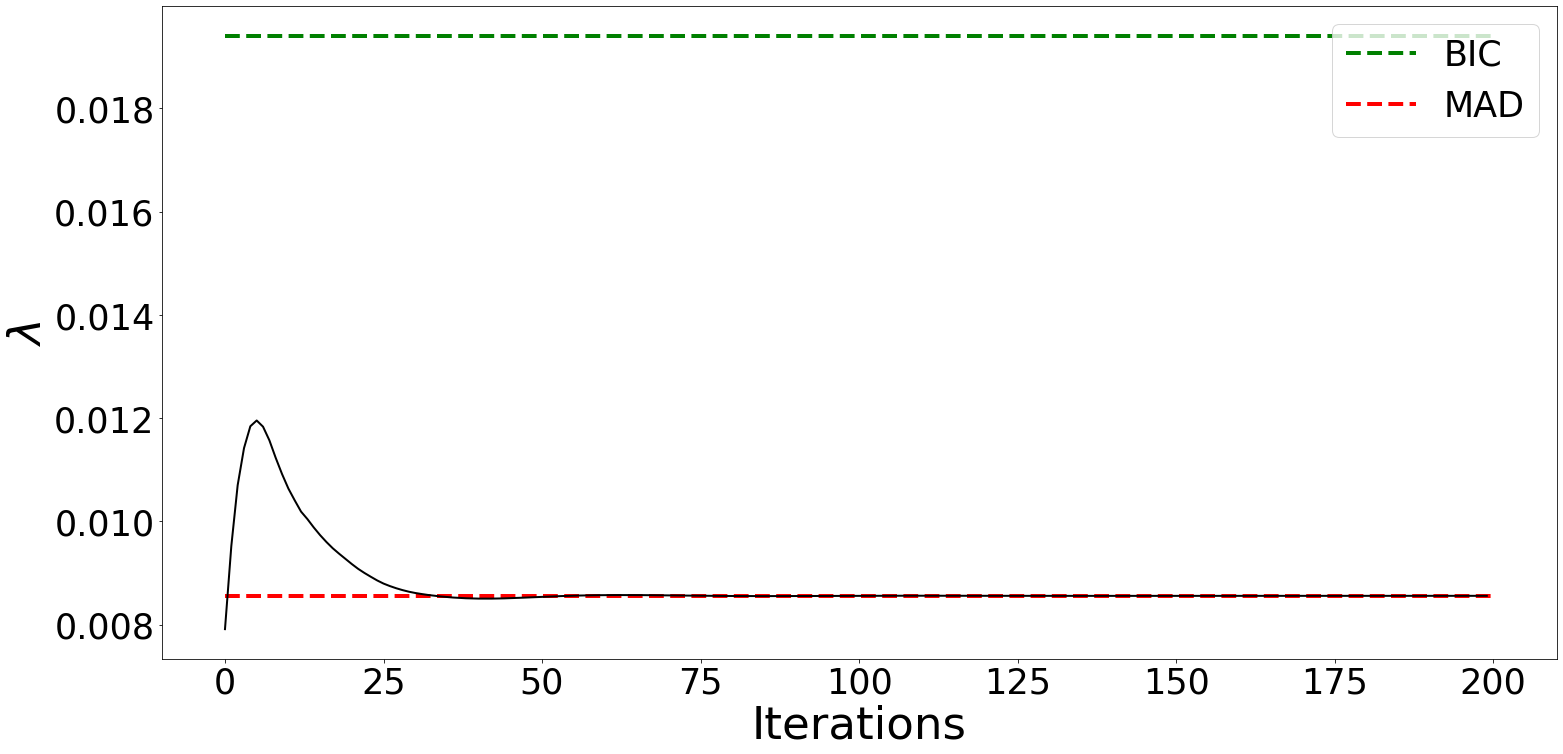

In [11]:
plt.figure(figsize=(25,12))
plt.plot(ta_lambdas, color="black", linewidth=2)
plt.hlines(lambdas_pfm_spike[bic_pfm_spike_idx], xmin=0, xmax=200, color="green", linewidth=4, linestyle="--", label="BIC")
plt.hlines(mad_lambda, xmin=0, xmax=200, color="red", linewidth=4, linestyle="--", label="MAD")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax = plt.gca()
ax.set_xlabel('Iterations', fontsize=fontsize+10)
ax.set_ylabel('$\lambda$', fontsize=fontsize+10)
plt.legend(fontsize=fontsize)

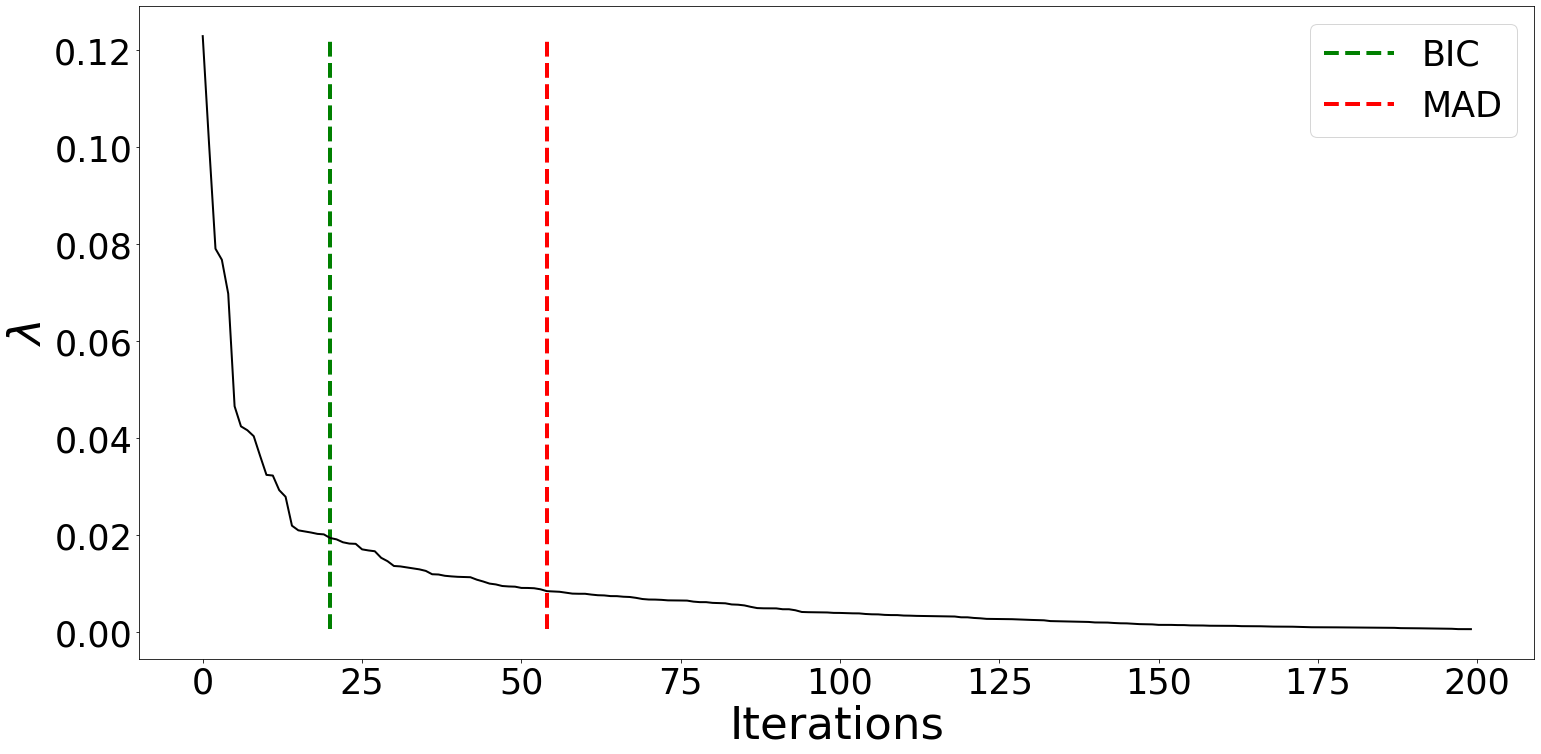

In [12]:
plt.figure(figsize=(25,12))
plt.plot(lambdas_pfm_spike, color="black", linewidth=2)
plt.vlines(bic_pfm_spike_idx, ymin=np.min(lambdas_pfm_spike), ymax=np.max(lambdas_pfm_spike), linewidth=4, color="green", linestyle="--", label="BIC")
plt.vlines(mad_lambda_idx, ymin=np.min(lambdas_pfm_spike), ymax=np.max(lambdas_pfm_spike), linewidth=4, color="red", linestyle="--", label="MAD")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax = plt.gca()
ax.set_xlabel('Iterations', fontsize=fontsize+10)
ax.set_ylabel('$\lambda$', fontsize=fontsize+10)
plt.legend(fontsize=fontsize)

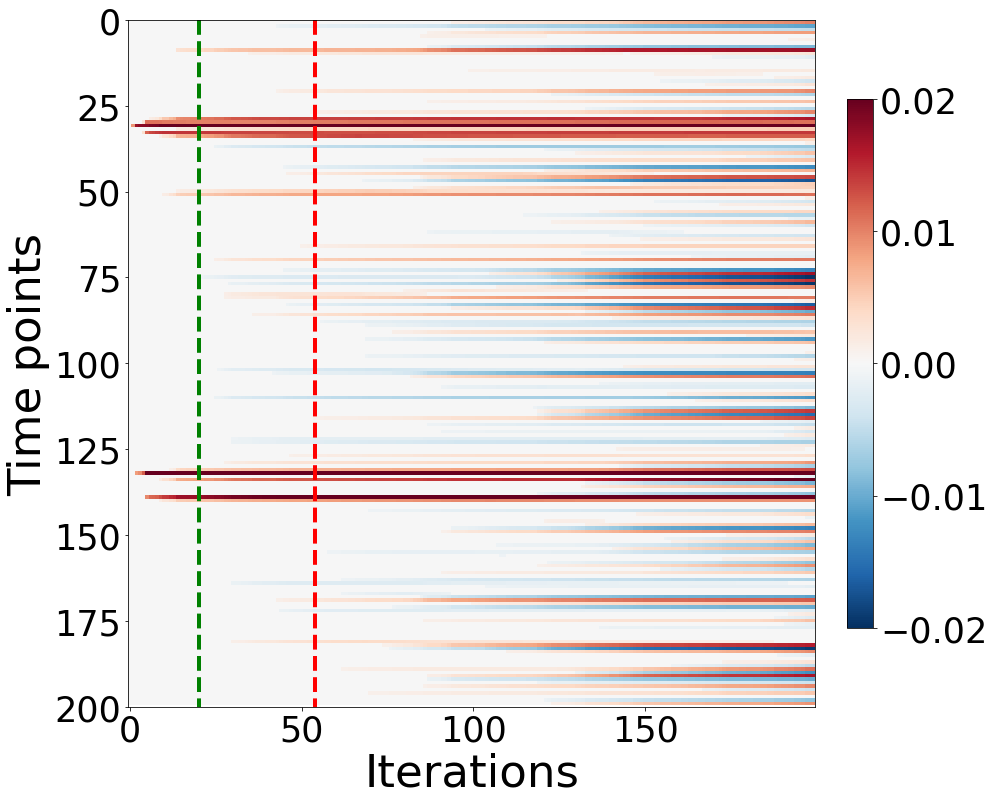

In [13]:
plt.figure(figsize=(45,12))
plt.imshow(pfm_spike_coef_path, cmap='RdBu_r', vmin=-.02, vmax=.02)
plt.vlines(x=bic_pfm_spike_idx, ymin=0, ymax=nscans, color='green', linestyles='dashed', label='BIC', linewidth=4)
plt.vlines(x=mad_lambda_idx, ymin=0, ymax=nscans, color='red', linestyles='dashed', label='BIC', linewidth=4)
plt.ylim([nscans, 0])
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax = plt.gca()
ax.set_xlabel('Iterations', fontsize=fontsize+10)
ax.set_ylabel('Time points', fontsize=fontsize+10)
cbar = plt.colorbar(shrink=0.77, pad=0.01)
cbar.ax.tick_params(labelsize=fontsize) 
plt.tight_layout()

In [14]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/Users/enekourunuela/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'